Introduction:


John Doe is a rich billionaire invester who enjoys investing his money into different businesses and fields. Recently he has taken an interest in baseball and is looking to buy a team. John is also very competetive and enjoys winning. He was able to snatch some pitching statistics from the last 40 years in the Korean league. Knowing that a good pitching staff leads to a good winning team, he has asked us to predict the top 5 teams with the highest win percentage based on their pitching statistics.  


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os


#importing csv and doing a routine check on the info of the dataset

hey_batter = pd.read_csv('C:\\Users\\ebent\\OneDrive\\Documents\\GitHub\\Hey Batter Batter!\\Hey-Batter-Batter-\\csv\\kbopitchingdata.csv')
hey_batter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   323 non-null    int64  
 1   year                 323 non-null    int64  
 2   team                 323 non-null    object 
 3   average_age          323 non-null    float64
 4   runs_per_game        323 non-null    float64
 5   wins                 323 non-null    int64  
 6   losses               323 non-null    int64  
 7   win_loss_percentage  323 non-null    float64
 8   ERA                  323 non-null    float64
 9   run_average_9        323 non-null    float64
 10  games                323 non-null    int64  
 11  games_started        184 non-null    float64
 12  games_finished       184 non-null    float64
 13  complete_game        323 non-null    int64  
 14  shutouts             323 non-null    int64  
 15  saves                323 non-null    int

We can see we have a lot of different stats here. We most likely are not going to use all of them but we should know what each one does. Here is some identifying information so we know what we are working with: 

- year
- teams
- average_age: Average pitcher age
- runs_per_game: Runs scored per game
- wins: Total wins per season
- losses: Total losses per season
- win_loss_percentage
- ERA: Pitching ERA: number of earned runs a pitcher allows per 9 innings
- run_average_9: run average per 9 innings
- games: Games played
- games_started: Games started
- games_finished: Games finished
- complete_game: Complete games
- shutouts: No runs allowed and complete games
- saves: pitcher who finishes a game for the winning team (certain prerequisites required)
- innings_pitched
- hits: Hits allowed
- runs: Runs allowed
- earned_runs: Earned runs allowed
- home_runs: Home runs allowed
- walks: Walks allowed
- intentional_walks: Intentional walks allowed
- strikeouts
- hit_batter: Hit batter with pitch
- balks: An illegal act by a pitcher with a runner or runners on base entitling all batters to advance one base
- wild_pitches: potential bases being awarded
- batters_faced
- WHIP: (Walks + Hits) / Total Innings Pitched
- hits_9: Hits per 9 innings
- homeruns_9: Homeruns per 9 innings
- walks_9: Walks per 9 innings
- strikeouts_9: Strikeouts per 9 innings
- strikeout_walk: strikeouts / walks

So far it's a lot of information but we can already identify that some of these might be more important stats than others. For example ERA which is the number of earned runs a pitcher allows per 9 innings is probably a more important statistic than shutouts. In baseball the more runs you let the other team score the more likely it is your team loses. So having a low average ERA for your pitching staff is going to be a big part of a team's winning percentage. Shutouts on the other hand are pretty rare and is often a pretty low stat. Having a higher number than average is a good thing, but it probably won't be the main determining factor for deciding a team's win percentage. 

In [2]:
#taking head(-5) just for a better look at the data both at the top and bottom since the data spans over long years

hey_batter.head(-5)

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,314,1983,Haitai Tigers,25.3,3.90,55,44,0.556,3.16,3.97,...,45,NaN,NaN,3707,1.232,8.2,0.6,2.9,4.6,1.59
314,315,1983,Samsung Lions,26.1,4.18,46,50,0.479,3.42,4.18,...,58,NaN,NaN,3785,1.299,8.3,0.7,3.4,4.0,1.19
315,316,1983,OB Bears,26.9,4.32,44,55,0.444,3.54,4.36,...,62,NaN,NaN,3789,1.358,9.0,0.8,3.2,3.3,1.04
316,317,1983,Lotte Giants,26.4,4.64,43,56,0.434,3.79,4.65,...,47,NaN,NaN,3827,1.331,9.4,0.9,2.6,4.2,1.60


Initially we see we have some missing values that looks like they correspond to the earlier years of the data (1980s vs 2020s). I also noticed that the spread of the data takes place over 40 years time. Since we are predicting data for 2022, we should know that most professional athletes don't play for 40 years at a time but usually on an average from 5-15 years. We don't have to do anything for now but we most likely will split the data for training/testing based on this knowledge. 

Lets investigate a little more into our missing data values. 

In [3]:
#checking for null count values

hey_batter_missing = pd.concat([hey_batter.isnull().sum()], axis=1)
hey_batter_missing.columns=['missing']
hey_batter_missing.sort_values(by='missing', ascending=False)

,missing
balks,139
intentional_walks,139
games_finished,139
games_started,139
wild_pitches,139
hit_batter,0
home_runs,0
walks,0
strikeouts,0
id,0


All of the missing data have the same number of values in the same 5 categories which leads me to believe, based on our previous head(-5) that maybe these 5 categories were not stats that were recorded pre-a certain year in the Korean league.  

In [4]:
#subset a dataframe and checking for which year this information began recording

missing_df = hey_batter[['year', 'balks', 'intentional_walks', 'games_finished', 'games_started', 'wild_pitches']]
print(missing_df.to_string())

     year  balks  intentional_walks  games_finished  games_started  wild_pitches
0    2021    5.0               17.0           143.0          143.0          43.0
1    2021    1.0               18.0           141.0          143.0          56.0
2    2021    7.0               16.0           141.0          143.0          51.0
3    2021    3.0               13.0           141.0          143.0          56.0
4    2021    8.0               14.0           140.0          143.0          74.0
5    2021    4.0               27.0           142.0          143.0          58.0
6    2021    9.0               27.0           143.0          143.0          40.0
7    2021   11.0               22.0           142.0          143.0          56.0
8    2021    9.0                5.0           142.0          143.0          58.0
9    2021    5.0               19.0           142.0          143.0         102.0
10   2020    7.0               16.0           144.0          144.0          51.0
11   2020    4.0            

Looks like all the data pre-2001 was not inputted or at the very least not recorded during those time periods. We'll most likely have to do some more digging but it could be these stats are maybe not as important or were recently added due to some new information based on baseball knowledge. 

Next I'm going to take a look at the names of the teams which is our only object oriented data type. Since it spans over the range of 40 years, there is going to be duplicated name teams but I also know there have been additions and name changes over the years, for example: the SSG Landers recently changed their name but were known as the SK Wyverns originally. The team itself didn't change but only the name. So to make things easier, we should research and update all previous names to their current names of the teams. We will still be analyzing the same data of the team but lessen the clutterness. 

In [5]:
#check for which teams names are recorded

hey_batter['team'].value_counts()

Samsung Lions            40
Lotte Giants             40
LG Twins                 32
Hanwha Eagles            28
Doosan Bears             23
Kia Tigers               21
SK Wyverns               21
Haitai Tigers            19
OB Bears                 17
Hyundai Unicorns         12
Ssangbangwool Raiders     9
Nexen Heroes              9
NC Dinos                  9
Pacific Dolphins          8
Binggre Eagles            8
MBC Blue Dragons          8
KT Wiz                    7
Kiwoom Heroes             3
Chungbo Pintos            3
Sammi Superstars          3
Woori Heroes              2
SSG Landers               1
Name: team, dtype: int64

In [6]:
#renaming the teams to their current team name

hey_batter['team'].replace({'SK Wyverns': 'SSG Landers', 'Sammi Superstars': 'Kiwoom Heroes', 'Chungbo Pintos': 'Kiwoom Heroes', 'Pacific Dolphins': 'Kiwoom Heroes','Hyundai Unicorns': 'Kiwoom Heroes', 'Woori Heroes': 'Kiwoom Heroes', 'Nexen Heroes': 'Kiwoom Heroes', 'MBC Blue Dragons': 'LG Twins', 'Binggre Eagles': 'Hanwha Eagles', 'OB Bears': 'Doosan Bears', 'Haitai Tigers': 'Kia Tigers'}, inplace=True)

In [7]:
#recheck team names to see if they are updated

hey_batter['team'].value_counts()

LG Twins                 40
Doosan Bears             40
Samsung Lions            40
Kiwoom Heroes            40
Kia Tigers               40
Lotte Giants             40
Hanwha Eagles            36
SSG Landers              22
NC Dinos                  9
Ssangbangwool Raiders     9
KT Wiz                    7
Name: team, dtype: int64

Now that we have all our teams properly renamed, we need to make sure the teams we are investigating are teams that participated in the 2021 season since we will be predicting the top teams for the 2022 season. 

In [8]:
#check first for teams that played in the 2021 season as our target teams of interest

teams_of_interest = hey_batter[hey_batter['year'] == 2021]
teams_of_interest

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79
5,6,2021,Kiwoom Heroes,25.8,4.89,69,67,0.507,4.33,5.02,...,80,4.0,58.0,5568,1.469,9.2,0.7,4.1,6.4,1.58
6,7,2021,SSG Landers,27.3,5.13,66,63,0.512,4.80,5.20,...,78,9.0,40.0,5661,1.504,9.1,1.0,4.4,7.1,1.61
7,8,2021,Hanwha Eagles,27.0,5.13,49,82,0.374,4.67,5.29,...,101,11.0,56.0,5633,1.496,8.6,0.8,4.8,7.2,1.50
8,9,2021,Kia Tigers,25.3,5.22,58,75,0.436,4.89,5.33,...,104,9.0,58.0,5658,1.500,9.1,1.0,4.4,6.8,1.54
9,10,2021,Lotte Giants,27.1,5.64,64,71,0.474,5.39,5.75,...,86,5.0,102.0,5722,1.571,9.5,0.9,4.7,7.5,1.60


We have 10 teams in total that participated in the 2021 season that we will be analyzing. The only team not apart of the 2022 season is the Ssangbangwool Raiders who had unfortunately sold their franchise spot to the SSG Landers due to bankruptcy.  

Next lets look at our win percentage for each team. Our goal is to predict each teams win percentage and find the highest win percentages of those teams so we should check out our ovservation of choice are for each team. 

In [9]:
#calculating the average win percentage of each team and sort by highest

avg_team_win_perc = hey_batter.groupby('team')[['win_loss_percentage']].mean()
avg_team_win_perc.rename(columns={'win_loss_percentage': 'avg_win_loss_percentage'}, inplace=True)
avg_team_win_perc = avg_team_win_perc.sort_values(by = 'avg_win_loss_percentage', ascending=False)
avg_team_win_perc.head(11)

,avg_win_loss_percentage
team,
Samsung Lions,0.553425
NC Dinos,0.526222
Doosan Bears,0.524775
SSG Landers,0.520682
Kia Tigers,0.519525
LG Twins,0.491175
Kiwoom Heroes,0.481725
Lotte Giants,0.470825
Hanwha Eagles,0.467750


In [10]:
#checking for the best win percentage each team has gotten to see if there is any similarities in the top 5 for averages and max

max_team_win_perc = hey_batter.groupby('team')[['win_loss_percentage']].max()
max_team_win_perc.rename(columns={'win_loss_percentage': 'max_win_loss_percentage'}, inplace=True)
max_team_win_perc = max_team_win_perc.sort_values(by = 'max_win_loss_percentage', ascending=False)
max_team_win_perc.head(11)

,max_win_loss_percentage
team,
Samsung Lions,0.706
Doosan Bears,0.700
Kiwoom Heroes,0.695
Kia Tigers,0.659
SSG Landers,0.659
Hanwha Eagles,0.653
LG Twins,0.643
NC Dinos,0.601
Lotte Giants,0.591


In [11]:
#concat dataframes side by side

team_win_perc = pd.concat([avg_team_win_perc, max_team_win_perc], axis=1)
team_win_perc

,avg_win_loss_percentage,max_win_loss_percentage
team,,
Samsung Lions,0.553425,0.706
NC Dinos,0.526222,0.601
Doosan Bears,0.524775,0.700
SSG Landers,0.520682,0.659
Kia Tigers,0.519525,0.659
LG Twins,0.491175,0.643
Kiwoom Heroes,0.481725,0.695
Lotte Giants,0.470825,0.591
Hanwha Eagles,0.467750,0.653


The top 5 teams have been able to retain an average win percentage of 0.51 or higher. Looking at the max win percentage each team has reached, Samsung Lions, Doosan Bears, SSG Landers, Kia Tigers are all within the top 5 of both max and average win percentage. Max win percentage isn't really important but this can be a slightly good indicator of which teams have a good structured organization and are able to maintain top standing positions within the league. 

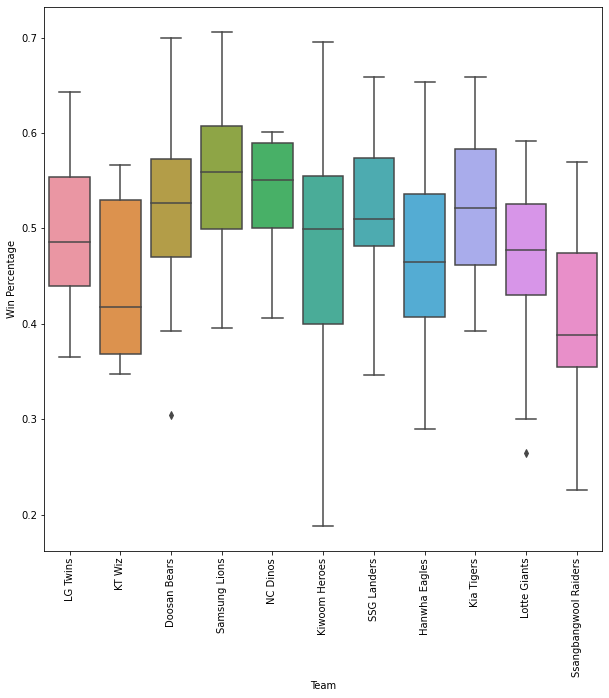

In [12]:
#create a boxplot to get a graphical view of win percentages and where each teams quartiles stand

plt.subplots(figsize=(10, 10))
sns.boxplot(x='team', y='win_loss_percentage', data=hey_batter)
plt.xticks(rotation='vertical')
plt.ylabel('Win Percentage')
plt.xlabel('Team');

Our boxplot displays the ranges of win percentage our teams have had over the years. Most of the ranges stay within 0.4 to 0.58 percent. However some teams show smaller boxes such as NC Dinos or SSG Landers that display more consistency compared to a team such as Ssandbangwoo Raiders or Kiwoom Heroes which have larger boxes and ranges displaying less consistent winning seasons. Teams like the NC Dinos and Samsung Lions also have a higher 25% quartile compared to other teams showing that on average they will have higher winning season percentages compared to other teams. 


Next we will look at our numeric data. So far we know that we are missing some data from the earlier years of the KBO for a few of our stats, but for the most part we have a pretty filled in dataset. 

In [13]:
#using .describe() to get a numerical analysis of our feature values

hey_batter.describe().T

,count,mean,std,min,25%,50%,75%,max
id,323.0,162.000000,93.386294,1.000,81.5000,162.000,242.5000,323.000
year,323.0,2002.944272,11.501957,1982.000,1993.0000,2003.000,2013.0000,2021.000
average_age,323.0,26.886687,1.608472,23.300,25.7000,26.900,28.0000,32.400
runs_per_game,323.0,4.621858,0.734223,2.980,4.0400,4.620,5.0600,7.180
wins,323.0,62.507740,12.508225,15.000,54.0000,63.000,71.0000,93.000
losses,323.0,62.482972,12.446988,24.000,53.0000,62.000,71.5000,97.000
win_loss_percentage,323.0,0.500043,0.087081,0.188,0.4445,0.504,0.5615,0.706
ERA,323.0,4.207833,0.750075,2.540,3.6300,4.220,4.7000,6.350
run_average_9,323.0,4.689783,0.768520,3.030,4.0900,4.670,5.1800,7.470
games,323.0,128.142415,12.996350,80.000,126.0000,128.000,133.0000,144.000


The .describe.T is a good way to look at the entire KBO league stats to see some league averages. However we know that we have quite some data missing from a few of our stats. It's important to note that since these teams are in the league together and facing against each other, our averages mean much more in terms of determining which teams will on average do better. Since they compete in a league against each other that means there is an order of their stats, such as when a team places last place then there is an equally opposite first place and so on so forth. So when team stats are above average that means they are doing better than most of the other league teams. Now this data encompasses all team data from 1980s and teams generally have changed a lot over the years but the league averages should still hold up about the same. Let's check. 

In [14]:
#doing the same as above but with more recent baseball years (2000's)

hey_batter_2000 = hey_batter[hey_batter['year'] > 2000]
hey_batter_2000.describe().T

,count,mean,std,min,25%,50%,75%,max
id,184.0,92.500000,53.260367,1.000,46.75000,92.5000,138.25000,184.000
year,184.0,2011.559783,6.121423,2001.000,2006.00000,2012.0000,2017.00000,2021.000
average_age,184.0,27.611957,1.399402,23.800,26.57500,27.6000,28.52500,32.400
runs_per_game,184.0,4.874891,0.670656,3.560,4.36750,4.8300,5.34000,6.950
wins,184.0,66.288043,11.052714,35.000,59.00000,66.5000,73.25000,93.000
losses,184.0,66.288043,11.146744,43.000,57.00000,66.5000,74.00000,97.000
win_loss_percentage,184.0,0.500049,0.078648,0.265,0.45075,0.5000,0.56000,0.659
ERA,184.0,4.494076,0.651622,3.220,3.98000,4.4600,4.96250,6.350
run_average_9,184.0,4.940163,0.698318,3.580,4.40750,4.8900,5.44750,7.090
games,184.0,135.423913,7.089180,126.000,128.00000,133.0000,144.00000,144.000


Even if we take the newer generation of teams based on year, the averages for stats are still generally the same with miniscule differences. Lets check our data graphically using some histograms to see the distribution of our features. 

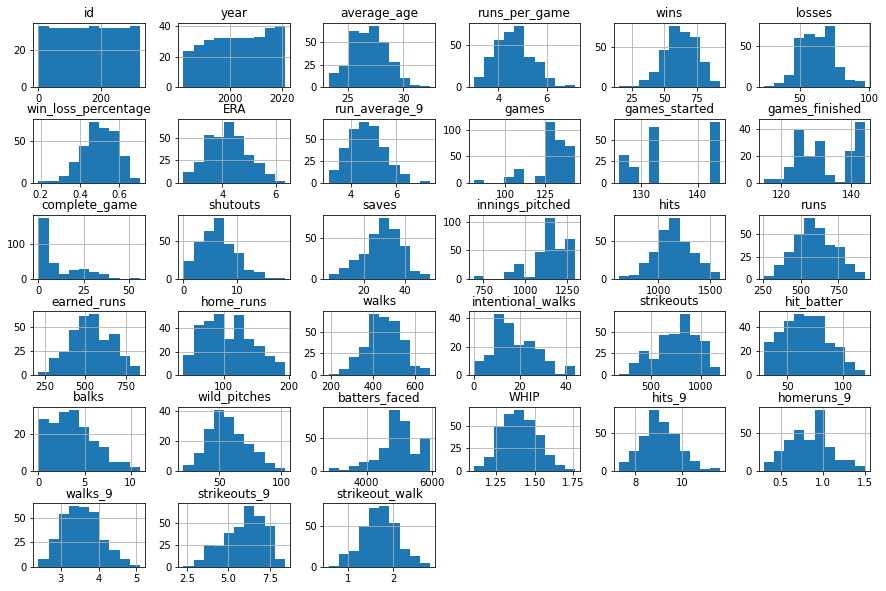

In [15]:
#plotting our histogram of our features, helps with looking at our distribution of features

hey_batter.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

At a first glance it seems we have quite some skewed data or large amounts of gaps within the data with: 

1. games
2. games_started
3. games_finished
4. innings_pitched
5. batters_faced

However, we know should know that the KBO have made changes over the years to increase the amount of games that are in a season. With this increase in games it makes sense why there might be gaps in games or games_started or why there might be skews in the data. Since the amount of games have increased, the amount of games_finished, innings_pitched, and batters_faced would increase and begin to skew left or the amount of games they started (games_started) would increase explaining a gap between the number ranges. Both games_finished and games_started are also part of our missing data values as well. 

The complete_games stat also looks skewed right at first but it can be explained that back in the older days of baseball, pitchers used to actually pitch complete games regularly which explains why there is a quite a few numbers in the 15-60 range. However, as time went on this practice stopped due to the prevalence of injuries and trying to preserve player's prime years explaining the massive increase in count for the 0-5 range. Nowadays pitchers don't regularly pitch complete games unless for no-hitters or perfect games which are pretty rare.  

Everything else looks up to par. 

First lets handle our missing values. Half of the data for thats stats are missing so it wouldn't make sense to impute the data or take averages for half of the data, so we'll just drop them. 

In [16]:
#dropping our columns with missing values since there is way too many

hey_batter.drop(columns=['balks', 'intentional_walks', 'games_finished', 'games_started', 'wild_pitches'], inplace=True)

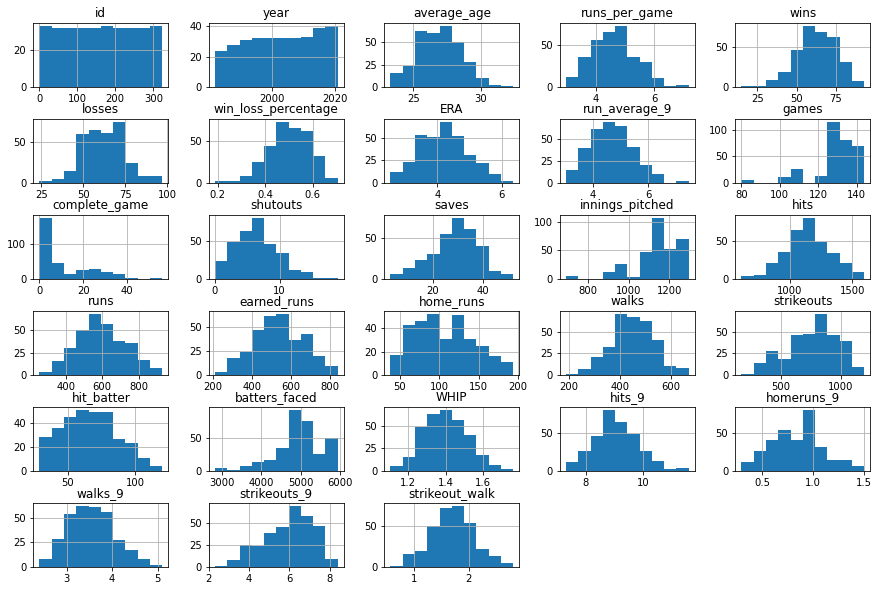

In [17]:
#rechecking distributions after dropped columns
hey_batter.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Next lets look at some team summary statistics. Right now we see our distributions for our features but they don't distinguish between teams. We're only going to be looking at a few of these features based on our own baseball knowledge to understand which statistics would most likely be important in winning games. Whats important to note is baseball is a sport where you buy runs since runs are what win games. So when looking at pitchers, you want stats that prevent runs. Things such as: 

1.ERA - (earned run average per 9 innings) 

2.WHIP - (walks and hits per inning) 

3.strikeouts_9 - (strikeouts per 9 innings)

4.saves - (relief pitchers who end the game on a win)

5.innings_pitched - (the amount of innings a team has pitched)

The reasons for picking these stats are pretty simple to understand. When playing baseball the more amount of runs you score the higher your chances for winning. So a pitcher's job is to prevent runs and people getting on base (getting on base leads to scoring). A team with a low average ERA, low average WHIP, high average strikeouts_9, high average saves, and high average innings_pitched shows they can prevent runs, prevent people getting on base a lot, and have high durability for lots of games.


In [30]:
team_summary = hey_batter.groupby('team').agg(
    year = pd.NamedAgg(column='year', aggfunc='size'), #could pick any column here
    team_ERA = pd.NamedAgg(column='ERA', aggfunc='mean'),
    team_WHIP = pd.NamedAgg(column='WHIP', aggfunc='mean'),
    team_strikeouts_9 = pd.NamedAgg(column='strikeouts_9', aggfunc='mean'),
    team_saves = pd.NamedAgg(column='saves', aggfunc='mean'),
    team_innings_pitched = pd.NamedAgg(column='innings_pitched', aggfunc='mean')
    
).reset_index()
team_summary.head(10)

,team,year,team_ERA,team_WHIP,team_strikeouts_9,team_saves,team_innings_pitched
0,Doosan Bears,40,3.938250,1.375900,5.707500,28.500000,1123.535000
1,Hanwha Eagles,36,4.483056,1.422611,6.061111,28.527778,1149.297222
2,KT Wiz,7,5.010000,1.519143,6.771429,27.428571,1270.200000
3,Kia Tigers,40,4.069250,1.362825,6.130000,27.550000,1119.410000
4,Kiwoom Heroes,40,4.233000,1.414600,5.805000,29.200000,1124.942500
5,LG Twins,40,4.107750,1.396600,5.542500,30.075000,1125.827500
6,Lotte Giants,40,4.238500,1.405575,5.695000,23.325000,1120.267500
7,NC Dinos,9,4.474444,1.423556,7.266667,31.333333,1246.688889
8,SSG Landers,22,4.309545,1.412636,6.831818,32.272727,1199.409091
9,Samsung Lions,40,4.103000,1.389850,5.915000,32.575000,1124.095000


This is the team summaries including their average stats and how many years each team has been in the league. From here we can do some comparisons to the league averages we calculated above. 

This concludes the Data Wrangling portion of this project. 